In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [13]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
PyBer_ride_data_to_load = "Resources/PyBer_ride_data.csv"

In [14]:
# Read files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
PyBer_ride_data_df = pd.read_csv(PyBer_ride_data_to_load)

In [15]:
pyber_data_df = pd.merge(ride_data_df, city_data_df)

In [16]:
total_rides_df = pyber_data_df[['type', 'ride_id']].groupby(['type']).count()
total_drivers_df = pyber_data_df[['type', 'driver_count']].groupby(['type']).sum()
total_fares_df = pyber_data_df[['type', 'fare']].groupby(['type']).sum()
avg_fare_perride_df = total_fares_df['fare']/total_rides_df['ride_id']
avg_fare_perdriver_df = total_fares_df['fare']/total_drivers_df['driver_count']

In [17]:
summary_df = pd.DataFrame({'Total Rides':total_rides_df['ride_id'], 'Total Drivers':total_drivers_df['driver_count'], 'Total Fares':total_fares_df['fare'], 'Average Fares per Ride': avg_fare_perride_df, 'Average Fares per Driver': avg_fare_perdriver_df})
summary_df.index.name = None

In [18]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [19]:
summary_df['Total Fares'] = summary_df['Total Fares'].map('${:,.2f}'.format)
summary_df['Average Fares per Ride'] = summary_df['Average Fares per Ride'].map('${:,.2f}'.format)
summary_df['Average Fares per Driver'] = summary_df['Average Fares per Driver'].map('${:,.2f}'.format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [20]:
pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date', 'fare':'Fare', 'ride_id':'Ride ID', 'driver_count':'No. Drivers', 'type':'City Type'})

In [24]:
fares_df = pyber_data_df.copy()[['Date','City Type','Fare']]
fares_df['Date'] = pd.to_datetime(fares_df['Date'])
#fares_df['Date'].info()
fares_df = fares_df.set_index('Date')
total_fares_df = fares_df.groupby('City Type').resample('D').sum()

In [25]:
total_fares_df = total_fares_df.reset_index()

In [26]:
piv = total_fares_df.pivot(index= 'Date', columns ='City Type')

In [27]:
jan_to_may_df = piv.loc['2019-01-01':'2019-04-28']

In [28]:
weekly_fare = jan_to_may_df.resample('W').sum()
weekly_fare['Fare']

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


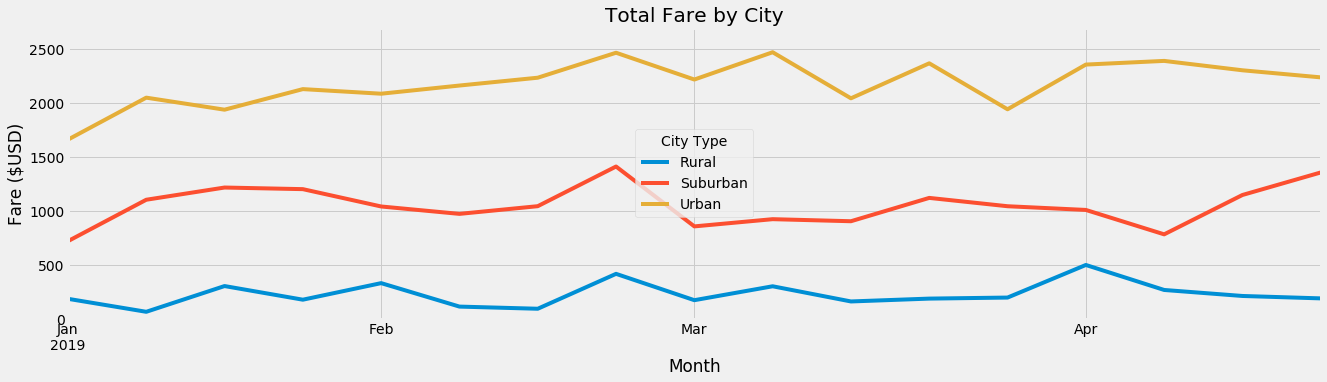

In [34]:
plt.style.use('fivethirtyeight')
weekly_fare['Fare'].plot(figsize=(20, 5), title = 'Total Fare by City', ylim = (0, 2700))
plt.ylabel('Fare ($USD)')
plt.xlabel('Month')
plt.savefig('analysis/Fig8.png')